In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
from selenium.webdriver.common.action_chains import ActionChains
import time

### Data Extraction with Beautiful Soup for best rated 20 companies

In [4]:
driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')
driver.get('https://www.trustpilot.com/')

/var/folders/bn/mxb8bm711w79zvytqtgfmjfr0000gn/T/ipykernel_3668/2727177390.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')


In [3]:
from bs4 import BeautifulSoup
import requests

response = requests.get('https://www.trustpilot.com/categories/mens_clothing_store')
response.status_code

soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()
list_items = soup.find_all('div', {'class':'paper_paper__29o4A paper_outline__3rnlh card_card__2F_07 card_noPadding__1tkWv styles_wrapper__2QC-c'})

company_name = [result.find(class_="typography_heading-xs__D8ZZo").get_text() for result in list_items]
trust_score = [result.find(class_="typography_appearance-subtle__2GxHy").get_text().split('|')[0] for result in list_items]
no_of_reviews = [result.find(class_="typography_appearance-subtle__2GxHy").get_text().split('|')[1] for result in list_items]

cloth_store = pd.DataFrame({'Company_Name': company_name, 'Trust_Score': trust_score, 'No_of_Reviews': no_of_reviews})
cl = cloth_store.convert_dtypes()

cl['TrustScore'] = cl['Trust_Score'].apply(lambda i: i.translate({ord(i): None for i in 'TrustScore'}))
cl['TrustScore'] = cl['TrustScore'].astype(str).astype(float)

cl['No.Reviews'] = cl['No_of_Reviews'].apply(lambda i: i.translate({ord(i): None for i in 'reviews'}))
cl['No.Reviews'] = cl['No.Reviews'].apply(lambda i: i.translate({ord(i): None for i in ','}))
cl['No.Reviews'] = cl['No.Reviews'].astype(str).astype(int)

cl

,Company_Name,Trust_Score,No_of_Reviews,TrustScore,No.Reviews
0,Union 22,TrustScore 4.9,507 reviews,4.9,507
1,A.K. RIKK's,TrustScore 4.9,283 reviews,4.9,283
2,Hastamuerte,TrustScore 4.8,974 reviews,4.8,974
3,Otrium,TrustScore 4.8,930 reviews,4.8,930
4,Angeljackets,TrustScore 4.8,759 reviews,4.8,759
5,Lebo's,TrustScore 4.8,751 reviews,4.8,751
6,CelticClothing.com,TrustScore 4.8,377 reviews,4.8,377
7,Fan Jackets,TrustScore 4.8,245 reviews,4.8,245
8,USA Kilts,TrustScore 4.8,205 reviews,4.8,205
9,New Horizons Trading,TrustScore 4.8,60 reviews,4.8,60


### Data Extraction with Beautiful Soup for worst rated 20 companies

In [43]:
response = requests.get('https://www.trustpilot.com/categories/mens_clothing_store?page=12')
response.status_code

soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()
list_items = soup.find_all('div', {'class':'paper_paper__29o4A paper_outline__3rnlh card_card__2F_07 card_noPadding__1tkWv styles_wrapper__2QC-c'})

company_name = [result.find(class_="typography_heading-xs__D8ZZo").get_text() for result in list_items]
trust_score = [result.find(class_="typography_appearance-subtle__2GxHy").get_text().split('|')[0] for result in list_items]
no_of_reviews = [result.find(class_="typography_appearance-subtle__2GxHy").get_text().split('|')[1] for result in list_items]

cloth_store2 = pd.DataFrame({'Company_Name': company_name, 'Trust_Score': trust_score, 'No_of_Reviews': no_of_reviews})
cl2 = cloth_store2.convert_dtypes()

cl2['TrustScore'] = cl2['Trust_Score'].apply(lambda i: i.translate({ord(i): None for i in 'TrustScore'}))
cl2['TrustScore'] = cl2['TrustScore'].astype(str).astype(float)

cl2['No.Reviews'] = cl2['No_of_Reviews'].apply(lambda i: i.translate({ord(i): None for i in 'reviews'}))
cl2['No.Reviews'] = cl2['No.Reviews'].apply(lambda i: i.translate({ord(i): None for i in ','}))
cl2['No.Reviews'] = cl2['No.Reviews'].astype(str).astype(int)

cl2


,Company_Name,Trust_Score,No_of_Reviews,TrustScore,No.Reviews
0,Junkeeri,TrustScore 3.2,1 reviews,3.2,1
1,BESPOKE DAILY,TrustScore 3.2,1 reviews,3.2,1
2,WINGS,TrustScore 3.1,9 reviews,3.1,9
3,Outworq,TrustScore 3.1,6 reviews,3.1,6
4,Aaashirt,TrustScore 3.0,60 reviews,3.0,60
5,Zartoni,TrustScore 2.9,103 reviews,2.9,103
6,JERSEY LOCO,TrustScore 2.9,63 reviews,2.9,63
7,Birddogs,TrustScore 2.9,8 reviews,2.9,8
8,BAOBAB Clothing,TrustScore 2.9,8 reviews,2.9,8
9,Ten Thousand,TrustScore 2.8,72 reviews,2.8,72


### Concatenating best 20 & worst 20 dataframes

In [45]:
frames = [cl, cl2]
  
result = pd.concat(frames)
display(result)

,Company_Name,Trust_Score,No_of_Reviews,TrustScore,No.Reviews
0,Union 22,TrustScore 4.9,505 reviews,4.9,505
1,A.K. RIKK's,TrustScore 4.9,282 reviews,4.9,282
2,Hastamuerte,TrustScore 4.8,974 reviews,4.8,974
3,Otrium,TrustScore 4.8,929 reviews,4.8,929
4,Angeljackets,TrustScore 4.8,750 reviews,4.8,750
5,Lebo's,TrustScore 4.8,746 reviews,4.8,746
6,CelticClothing.com,TrustScore 4.8,370 reviews,4.8,370
7,USA Kilts,TrustScore 4.8,205 reviews,4.8,205
8,New Horizons Trading,TrustScore 4.8,60 reviews,4.8,60
9,JAXXON,TrustScore 4.7,"30,316 reviews",4.7,30316


### Correlation between TrustScore & Reviews

In [46]:
print(result['TrustScore'].corr(result['No.Reviews']))

0.19934361816888282


<AxesSubplot:xlabel='TrustScore', ylabel='No.Reviews'>

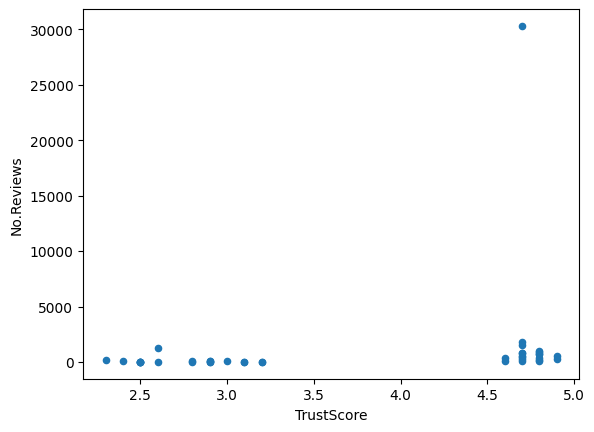

In [48]:
result.plot.scatter(x = 'TrustScore', y = 'No.Reviews')